# Python Programmieraufgabe und Clustering

## Über Data Science
Data Science setzt sich aus den Worten data "Daten" und science "Wissenschaft" zusammen. Im Deutschen also Datenwissenschaft und es geht ím generellen um die Extraktion von Wissen, Erkenntnissen und Mustern aus Daten.

Data Science ist ein interdisziplinäres Wissenschaftsfeld und spezifische Studiengänge (meist eine spätere Spezialisierung) gibt es erst seit kurzem. Es finden sich hier viele Informatiker*innen, Mathematiker*innen, Physiker*innen, aber auch andere sind hier zu finden. Dies sind Data Scientist oder Datenwissenschafter*in. Aber auch hier finden sich andere Bezeichnungen für gleiche Tätigkeitsbereiche.

Die Basis sind sowohl strukturierte Datenquellen wie Tabellen (beispielsweise Excel) oder unstrukturierte Daten (beispielsweise Dokumnete mit Text oder Bilder).

Ein großer Bereich ist das maschinelle Lernen, welches ein Teilbereich der Künstlichen Intelligenz ist. Hier werden unter anderem statistische und stochastische Methoden verwendet um Muster zu finden und Prognosen zu erstellen.

## Aufgabe
Wir möchten mit einem kleinen Projekt versteckte Muster in Daten finden und visualisieren. Hierzu verwenden wir die Programmiersprache python in einem sogenannten Notebook online. Im Gegensatz zu klassichen Programmen können wir hier die Zellen einzeln ausführen und uns Zwischenergebnisse ansehen. Die Zellen können verändert und Schritt für Schritt ausgeführt werden. Du kannst auch neue Zellen hinzufügen, wenn du etwas ausprobieren möchtest.

#### Einstieg
Zunächst werden benötigte Pakete installiert. 
* Numpy und Pandas werden sehr häufig von Data Scientisten genutzt. Mehr dazu später!
* CSV wird benötigt, da die Datentabelle eine csv Datei ist. Man kann sie auch in Excel öffnen.
* Matplotlib benötigen wir für die Grafiken.

In [10]:
# import necessary modules

import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt

### Einlesen der Daten
Die Datenpunkte sind in einer CSV Datei gespeichert. Dies ist eine Datei mit Datenpunkten im Tabellenformat, allerdings sind die einzelnen Spalten mit einem Komma voneinander getrennt.
Man kann diese Datei in Excel oder in einem Texteditor öffnen.

Aufgabe 1: Lies die Daten aus der Date "data1.csv" ein und speichere sie als ein Pandas-Dataframe unter dem Namen "data". Hier findest du Informationen zum Einlesen von: https://statisquo.de/2018/08/27/csv-dateien-in-python-importieren-mit-pandas/ 

Aufgabe 2: Lass dir die ersten 10 Zeilen von "data" ausgeben. Nutze hierzu diese Seite: https://www.delftstack.com/de/howto/python-pandas/get-first-row-of-dataframe-pandas/ 

In [11]:
# read data from 'data1.csv' and store the data in variable 'data'
data = pd.read_csv('data1.csv')
# show first ten rows in 'data'
data.head(10)

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729
5,24.169930,32.024780
6,21.665780,4.892855
7,4.693684,12.342170
8,19.211910,-1.121366
9,4.230391,-4.441536


Für die nächsten Aufgaben benötigen wir die Spalten separat.

Aufgabe 3: Wähle nur eine Spalte aus und drucke die ersten 10 Zeilen. Es gibt verschiedene Möglichkeiten: https://www.delftstack.com/de/howto/python-pandas/pandas-select-columns/ 

In [12]:
data["V1"].head(10)

0     2.072345
1    17.936710
2     1.083576
3    11.120670
4    23.711550
5    24.169930
6    21.665780
7     4.693684
8    19.211910
9     4.230391
Name: V1, dtype: float64

### Visualisierung der Daten

Jetzt möchten wir die Daten visualisieren. Hier findest du Informationen zum erstellen von Grafiken: https://www.delftstack.com/de/tags/matplotlib-scatter-plot/

Aufgabe 4: Erstelle eine Grafik mit einer der Spalten auf der x-Achse und die andere auf der y-Achse. Die Werte sollen als Punkte dargestellt werden, dies nennen wir ein Scatterdiagramm. Was fällt dir auf? Erkennst du ein Muster?

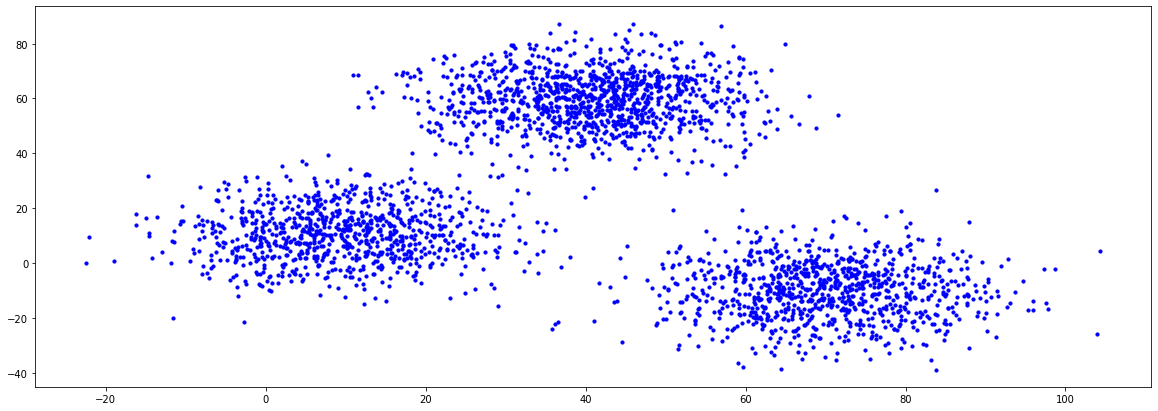

In [13]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.scatter(data["V1"], data["V2"], c='blue', s =10)

### Clustering Methode 1: k-means

Jetzt geht es ans Eingemachte! Wir möchten einen Algorithmus nutzen, der Muster in den Daten finden soll. Hierzu nutzenn wir den k-means Algorithmus und importieren dieses Modul.
Ein wenig mehr Informationen findest du beispielsweise hier: https://www.micromata.de/blog/k-means-clustering-big-data/ und hier: https://www-m9.ma.tum.de/material/felix-klein/clustering/Methoden/K-Means.php 

Der Algorithmus macht die ganze Arbeit für uns!


In [14]:
# import k-means module from sklearn
from sklearn.cluster import KMeans

In [15]:
# convert pandas dataframe data to numpy array data_array
data_array = data.values   


Aufgabe 5: Jetzt werden Cluster erstellt. Die Anzahl (cluster_num) kann man variieren. Was passiert wenn du verschiedene Anzahlen ausprobierst (maximal 9, sonst müssen noch mehr Farben hinzugefügt werden.)?

Aufgabe 6: Überlege dir was ein "gutes" Cluster ist? Welche Anzahl von Clustern sind (in diesem Beispiel) gut und warum?

Aufgabe 7: Nutze deinen finalen Wert für cluster_num.

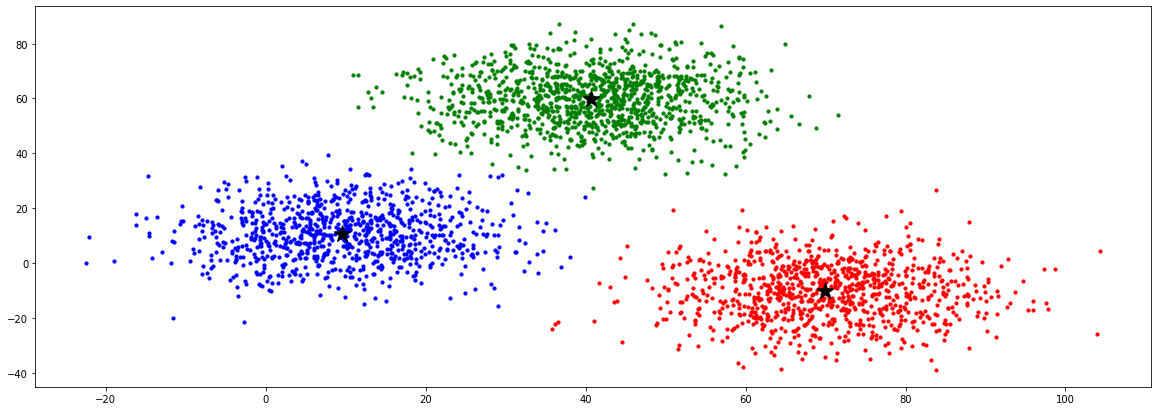

In [16]:
cluster_num = 3 # max 9

kmeans = KMeans(cluster_num).fit(data_array)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots()
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'orange', 'purple']
for cluster_index in range(cluster_num) :
    sub_set = np.array([data_array[i] for i in range(len(data_array)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')

## Clustering Methode 2: DBSCAN

Das gleiche wird mit dem Algorithmus DBSCAN gemacht. Mehr Informationen findest du hier:
https://www-m9.ma.tum.de/material/felix-klein/clustering/Methoden/Dichteverbundenes_Clustern.php

Aufgabe 8: Vergleiche die Ergebisse mit k-means. Was fällt dir auf? Welche Methode ist besser und warum?

In [17]:
# import DBSCAN module from sklearn
from sklearn.cluster import DBSCAN

[-1, 0, 1, 2]


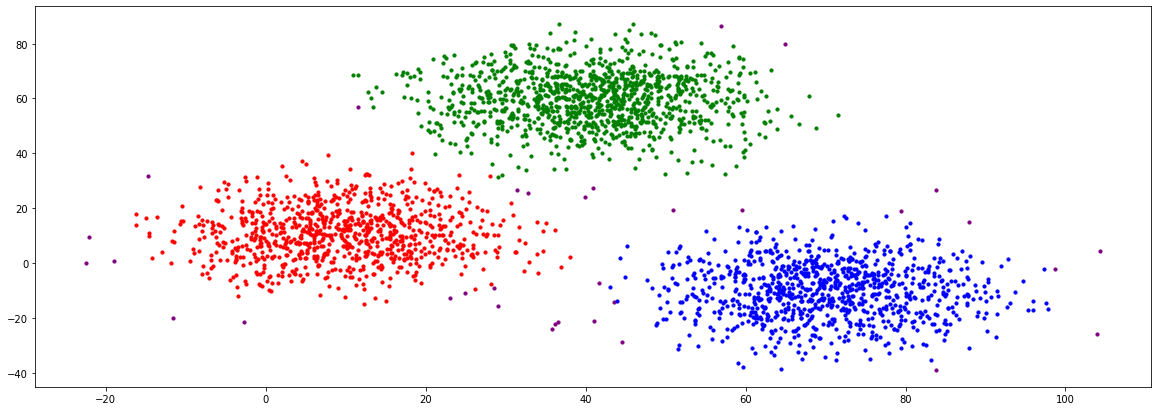

In [18]:
dbscan = DBSCAN(eps = 6, min_samples= 10).fit(data_array)
clusters = dbscan.labels_
cluster_indexs = np.unique(clusters).tolist()
print(cluster_indexs)

fig, plots = plt.subplots()
for cluster_index in cluster_indexs :
    sub_set = np.array([data_array[i] for i in range(len(data_array)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])


### Abschluss

Wir haben die Daten im 2 dimensionalen Raum geclustert. Dies kann man auch in vielen mehr Dimensionen wie beispielsweise 1000 Dimensionen ausführen. Dies kann man sich nur noch schwer vorstellen, aber auch hier werden Muster entdeckt, die für weitere Analysen genutzt werden können.